# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 8

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period, sma=70)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
242,2019-03-22,272.46,2019-04-01,278.88,6.42,2266.25,353,88450.85,LONG,SPY
243,2019-05-02,284.10,2019-05-03,286.88,2.78,962.11,346,89412.96,LONG,SPY
244,2019-05-07,280.93,2019-06-05,276.08,-4.85,-1711.74,353,87701.22,LONG,SPY
245,2019-07-19,291.35,2019-07-24,295.54,4.19,1402.43,335,89103.65,LONG,SPY
246,2019-07-31,291.61,2019-08-29,286.85,-4.76,-1611.97,339,87491.68,LONG,SPY
247,2019-09-20,293.79,2019-10-11,291.82,-1.97,-652.04,331,86839.64,LONG,SPY
248,2019-12-03,304.89,2019-12-12,312.36,7.47,2366.72,317,89206.37,LONG,SPY
249,2020-01-27,320.20,2020-02-04,325.70,5.50,1700.51,309,90906.88,LONG,SPY
250,2020-02-21,330.08,2020-03-26,260.06,-70.02,-21356.82,305,69550.05,LONG,SPY
251,2020-06-11,299.29,2020-06-22,310.62,11.33,3001.67,265,72551.72,LONG,SPY


In [8]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-06-16,83515.55,81412.76,83515.55,265,237.43,-
2020-06-17,83185.76,82254.40,83185.76,265,237.43,-
2020-06-18,82634.33,81898.22,82634.33,265,237.43,-
2020-06-19,83548.13,81467.88,83548.13,265,237.43,-
2020-06-22,82551.72,82551.72,82551.72,0,82551.72,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   1993-11-11
end                                                     2020-06-22
beginning_balance                                            10000
ending_balance                                            82551.72
total_net_profit                                          72551.72
gross_profit                                             142935.62
gross_loss                                               -70383.90
profit_factor                                                 2.03
return_on_initial_capital                                   725.52
annual_return_rate                                            8.25
trading_period                           26 years 7 months 11 days
pct_time_in_market                                           32.01
total_num_trades                                               252
trades_per_year                                               9.47
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-06-22 00:00:00 SELL 215 SPY @ 310.62


Plot Equity Curves: Strategy vs Benchmark

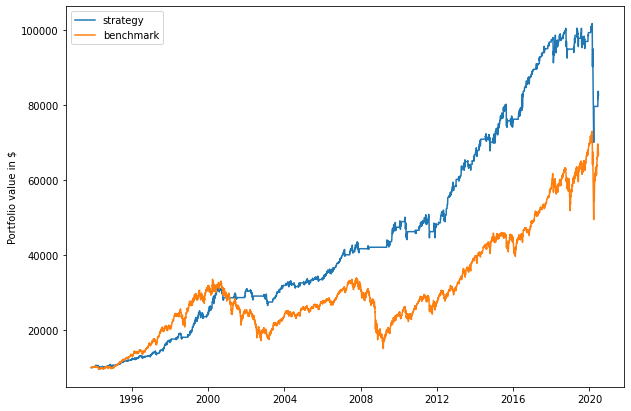

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

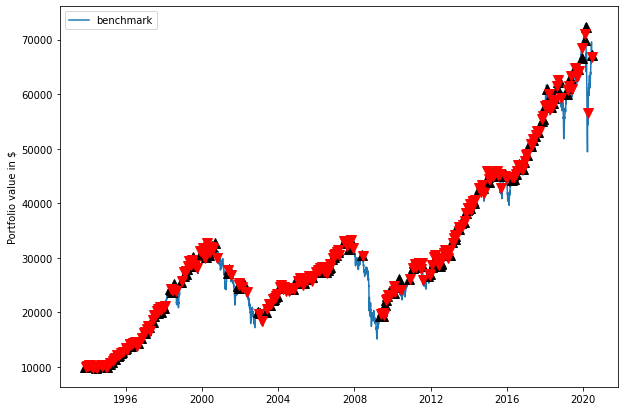

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,8.25,7.40
max_closed_out_drawdown,-31.13,-55.51
drawdown_annualized_return,-3.77,-7.50
drawdown_recovery,-0.08,-1.41
best_month,13.68,21.04
worst_month,-30.67,-31.13
sharpe_ratio,0.89,0.55
sortino_ratio,0.78,0.71
monthly_std,2.42,4.27


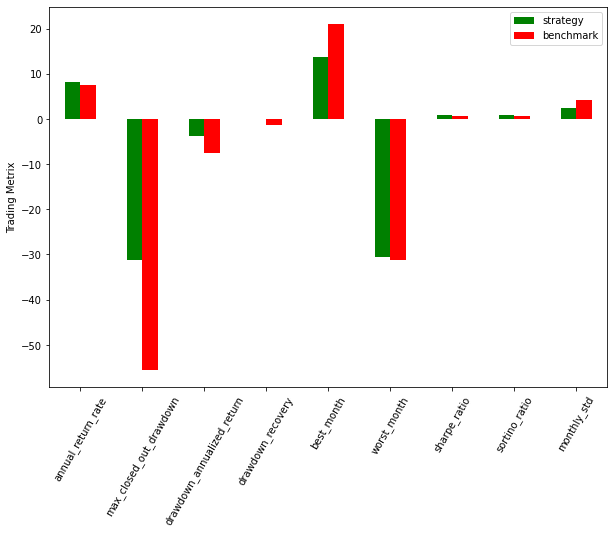

In [13]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2020-06-16   83515.55
2020-06-17   83185.76
2020-06-18   82634.33
2020-06-19   83548.13
2020-06-22   82551.72
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-06-16   67891.98
2020-06-17   67623.23
2020-06-18   67173.87
2020-06-19   67621.08
2020-06-22   66812.67
Name: close, dtype: float64

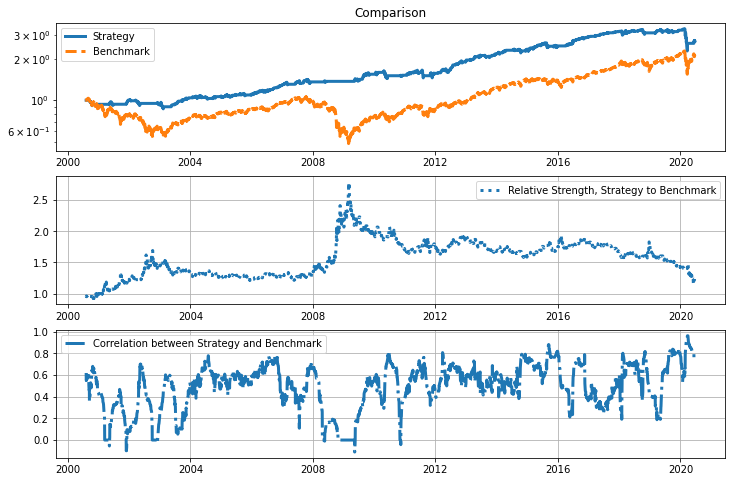

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)